# Poisson processes
___
A Poisson process with parameter $\lambda > 0$ is a stochastic process $N_t$ satisfying the following properties:
1. $N_0 = 0 \, \, a.s.$
1. For any $0 \le s < t$, $B_t - B_s$ is a Poisson random variable with parameter $\lambda(t-s)$, i.e., $$ P(N_t-N_s = k) = \frac{\lambda(t-s)^k}{k!} e^{-\lambda(t-s)}. $$ 
1. $N_t$ has independent increments.
1.  Almost all sample paths of $N_t$ is right continuous functions with left-hand limits.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%load_ext autoreload
%autoreload 1
%config InlineBackend.figure_formats = {'png', 'retina'}
sns.set()

In [2]:
# time interval must be far smaller than 1 
# because the jump interval is almost surely 1.
def poisson_process(step, lam=1, time_interval=1e-3):
    param = np.random.poisson(size=step, lam=lam*time_interval)
    coord = np.cumsum(param)
    return coord

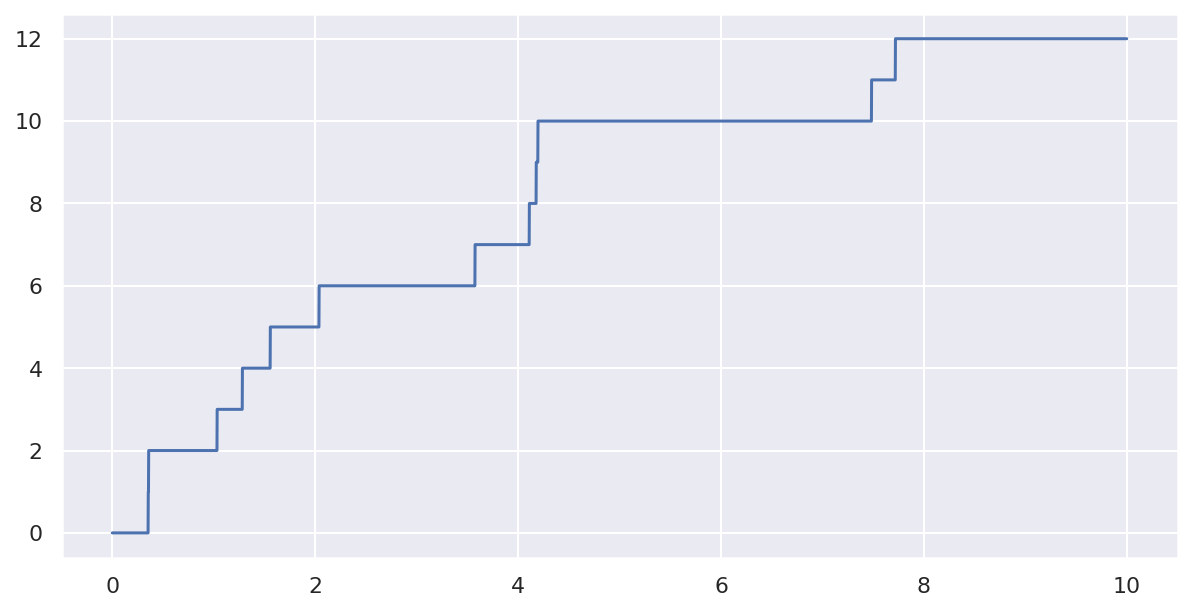

CPU times: user 438 ms, sys: 31.2 ms, total: 469 ms
Wall time: 481 ms


In [3]:
%%time
step = 10000
lam = 1
time_interval = 1e-3

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

t = np.arange(0, step * time_interval, time_interval)
x = poisson_process(step, lam, time_interval)
ax.plot(t, x)
plt.show()

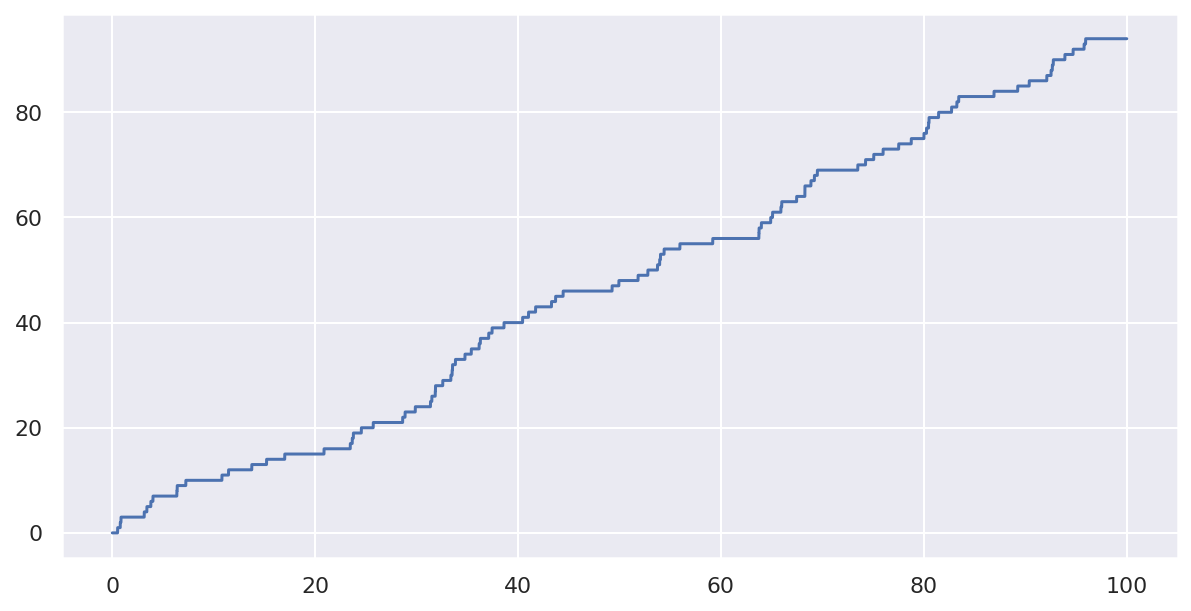

CPU times: user 438 ms, sys: 31.2 ms, total: 469 ms
Wall time: 466 ms


In [4]:
%%time
step = 100000
lam = 1
time_interval = 1e-3

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

t = np.arange(0, step * time_interval, time_interval)
x = poisson_process(step, lam, time_interval)
ax.plot(t, x)
plt.show()

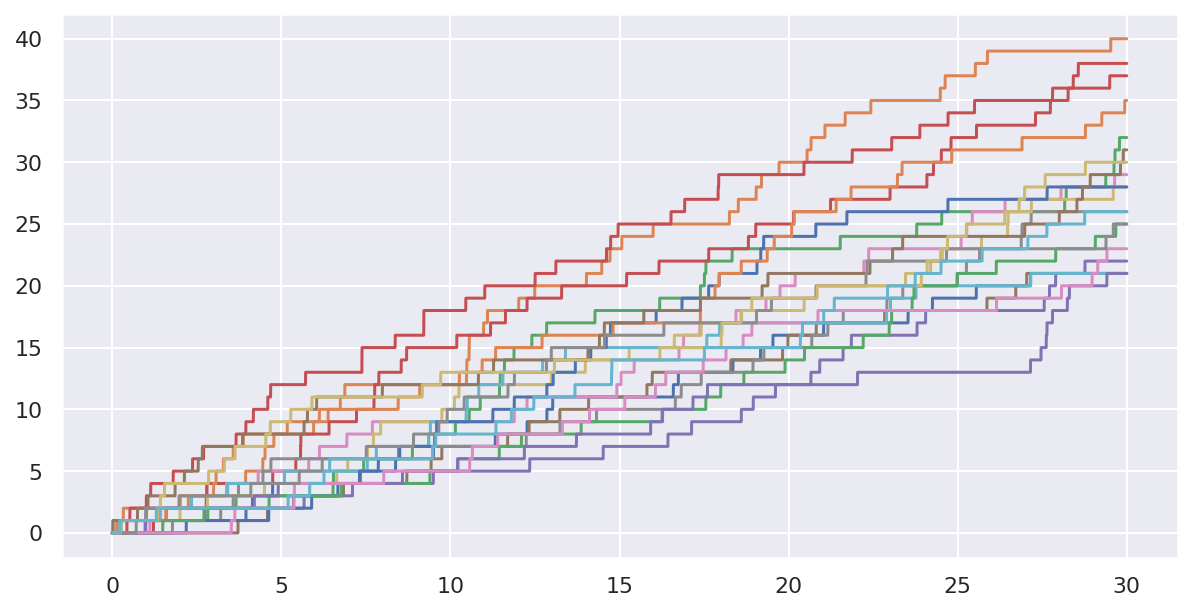

CPU times: user 594 ms, sys: 46.9 ms, total: 641 ms
Wall time: 651 ms


In [5]:
%%time
step = 30000
time_interval = 1e-3
num = 20

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
for i in range(num):   
    t = np.arange(0, step * time_interval, time_interval)
    x = poisson_process(step)
    ax.plot(t, x)
plt.show()

### change parameters (lambda)

/home/mo-mo-/programming/stochastic-processes/.venv/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


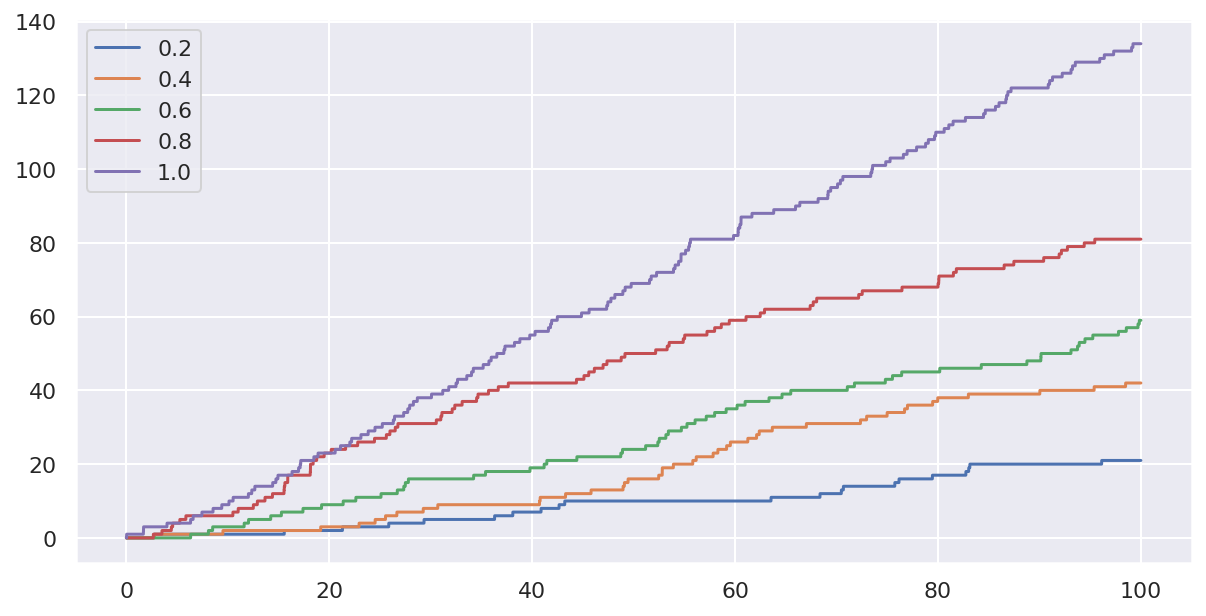

CPU times: user 938 ms, sys: 141 ms, total: 1.08 s
Wall time: 1.08 s


In [6]:
%%time
step = 100000
time_interval = 1e-3
lams = np.arange(0.2, 1.05, 0.2).round(2)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
for lam in lams:   
    t = np.arange(0, step * time_interval, time_interval)
    x = poisson_process(step, lam, time_interval)
    ax.plot(t, x, label=lam)
ax.legend()
plt.show()

## Jump time distributions
___
Let $T_1,T_2,\dots$ be jump times of a Poisson process $N_t$. i.e.,
$$T_0 = 0, \,\, T_i = \inf \{\, t > T_{i-1} \,| \, N_t - N_{t-} =1 \,\}.$$
And $S_i = T_i - T_{i-1}$ is jump interval times.
Then, $(S_i)$ are independent and exponentially distributed with parameter $\lambda$.

See `renewal-process.ipynb`.

# Compensated Poisson processes
___
A comlensated Poisson process is a stochastic process:
$$ N_t - \lambda t,$$
where $N_t$ is a Poisson process.

A compensated Poisson process is a martingale.

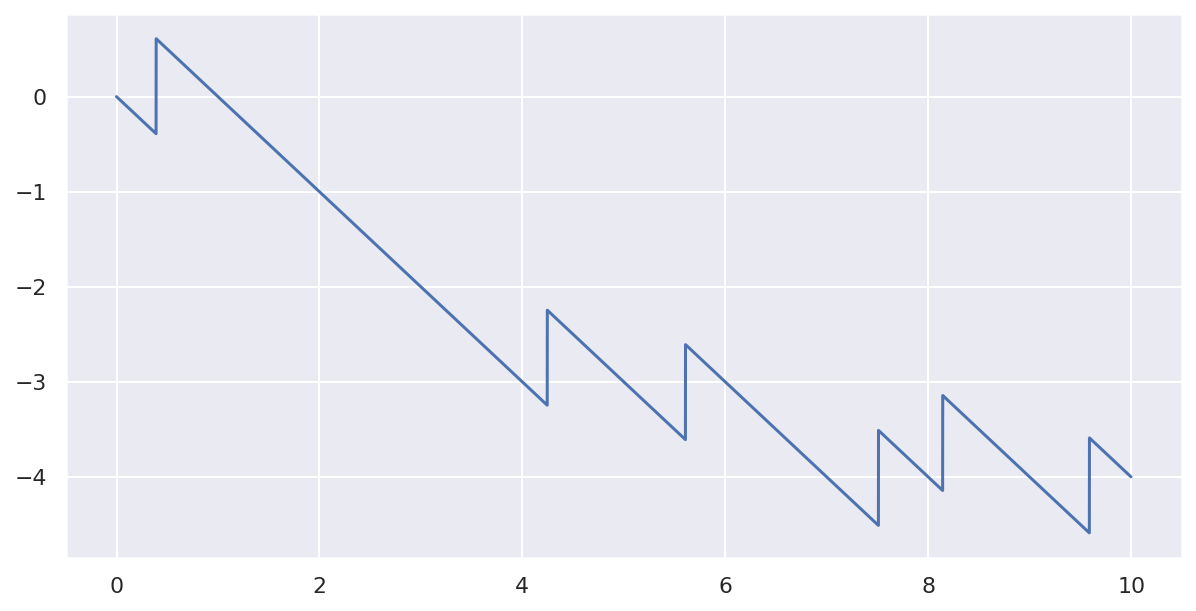

CPU times: user 406 ms, sys: 31.2 ms, total: 438 ms
Wall time: 431 ms


In [7]:
%%time
step = 10000
lam = 1
time_interval = 1e-3

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

t = np.arange(0, step * time_interval, time_interval)
x = poisson_process(step, lam, time_interval)
x = x.astype(np.float64) - lam * t
ax.plot(t, x)
plt.show()

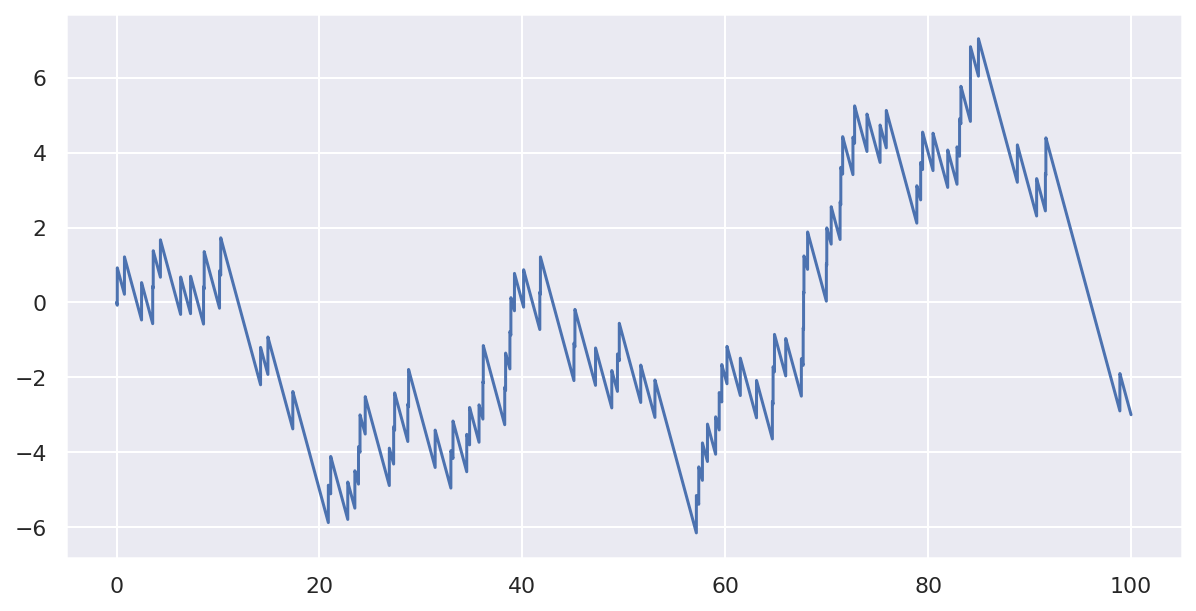

CPU times: user 453 ms, sys: 31.2 ms, total: 484 ms
Wall time: 468 ms


In [8]:
%%time
step = 100000
lam = 1
time_interval = 1e-3

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

t = np.arange(0, step * time_interval, time_interval)
x = poisson_process(step, lam, time_interval)
x = x.astype(np.float64) - lam * t
ax.plot(t, x)
plt.show()

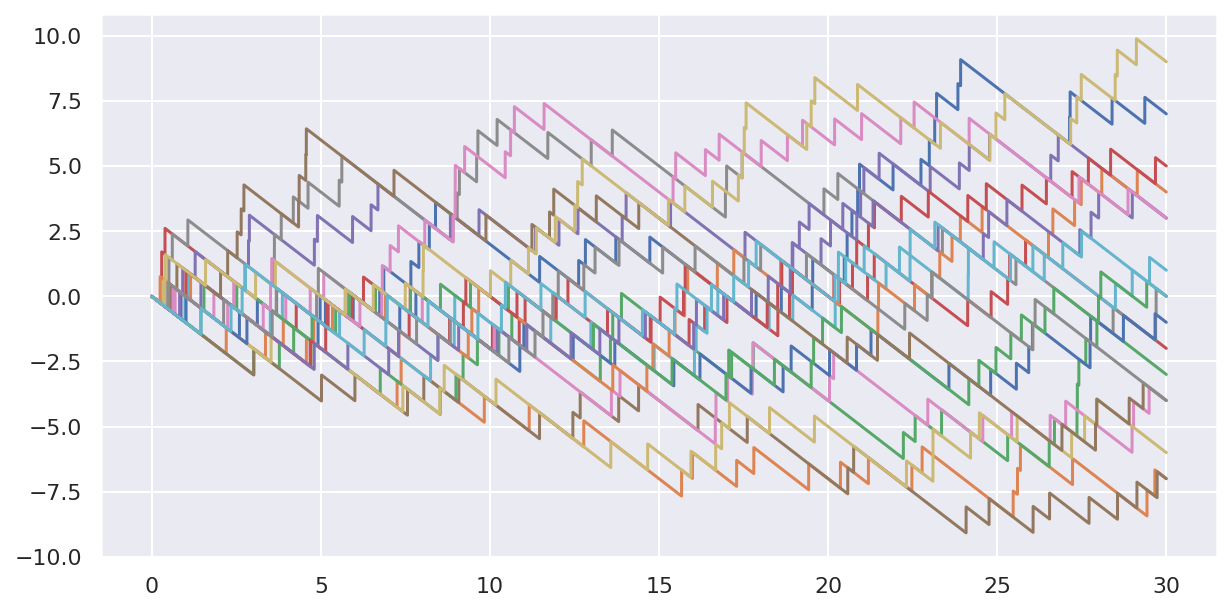

CPU times: user 875 ms, sys: 62.5 ms, total: 938 ms
Wall time: 961 ms


In [9]:
%%time
step = 30000
lam = 1
time_interval = 1e-3
num = 20

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
for i in range(num):   
    t = np.arange(0, step * time_interval, time_interval)
    x = poisson_process(step, lam, time_interval)
    x = x.astype(np.float64) - lam * t
    ax.plot(t, x)
plt.show()

### change parameters (lambda)

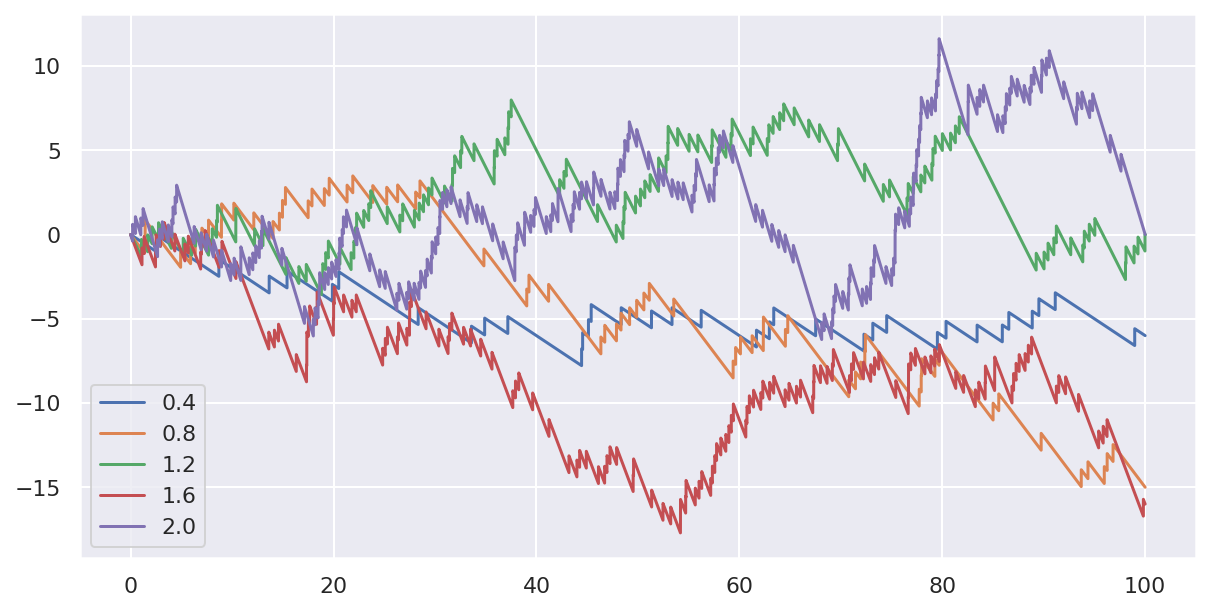

CPU times: user 1.23 s, sys: 188 ms, total: 1.42 s
Wall time: 1.41 s


In [10]:
%%time
step = 100000
time_interval = 1e-3
lams = np.arange(0.4, 2.05, 0.4).round(2)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
for lam in lams:   
    t = np.arange(0, step * time_interval, time_interval)
    x = poisson_process(step, lam, time_interval)
    x = x.astype(np.float64) - lam * t
    ax.plot(t, x, label=lam)
ax.legend()
plt.show()